# Analyzing wildfire activities in Australia


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
import pandas as pd 

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv")
df.head()


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [4]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

#### Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [5]:
import datetime as dt
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.year
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

#### Let's try to understand the change in average estimated fire area over time (use pandas to plot)


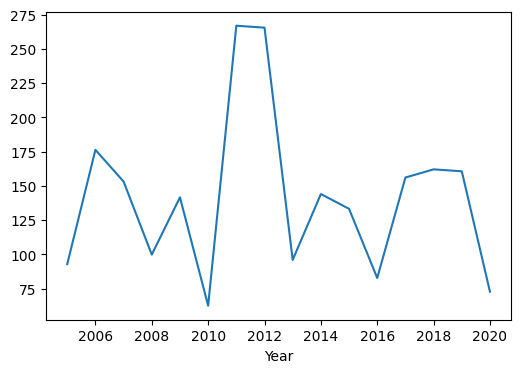

In [6]:
plt.figure(figsize=(6,4))
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
xlabel = ('Year')
ylabel = ('Average estimated area(km^2)')
title = ('Estimated fire area over time')
plt.show()

#### You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


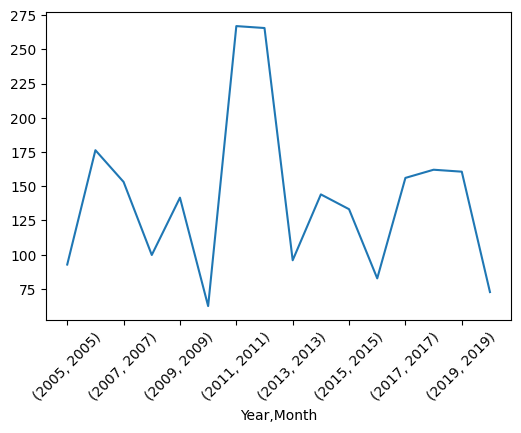

In [7]:
plt.figure(figsize=(6,4))
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
xlabel = ('Year','Month')
ylabel = ('Average estimated area(km^2)')
title = ('Estimated fire area over time')
plt.xticks(rotation=45)
plt.show()

#### Let's have an insight on the distribution of mean estimated fire brightness across the regions use the functionality of seaborn to develop a barplot


In [8]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

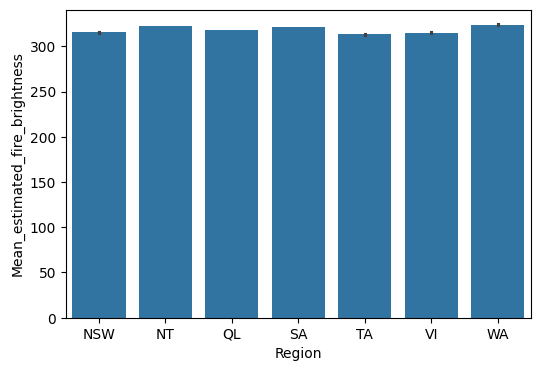

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness' ) 
xlabel = ('Region')
ylabel = ('Mean Etimated Fire Brightness(Kelvin)')
title = ('Distribution of Mean Estimated Fire Brightness of Region')

#### Let's find the portion of count of pixels for presumed vegetation fires vary across regions we will develop a pie chart for this


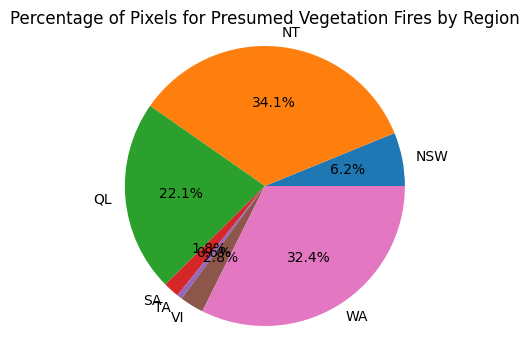

In [10]:
plt.figure(figsize=(6,4))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels = region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

#### See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 


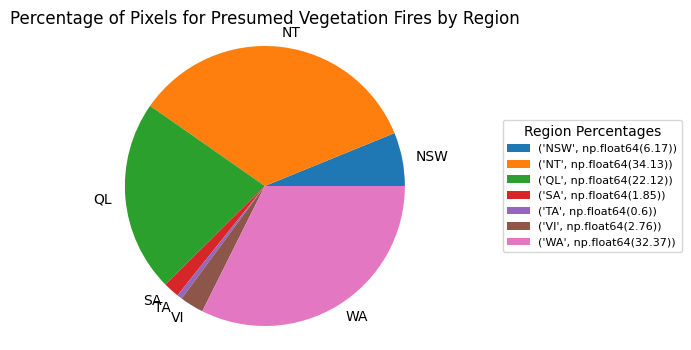

In [11]:
plt.figure(figsize=(6,4))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels = region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
lagend_labels = [(i,round(k/region_counts.sum()*100,2)) for i, k in zip(region_counts.index, region_counts)]
plt.legend(lagend_labels, title="Region Percentages", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)


plt.show()

#### Let's try to develop a histogram of the mean estimated fire brightness Using Matplotlib to create the histogram


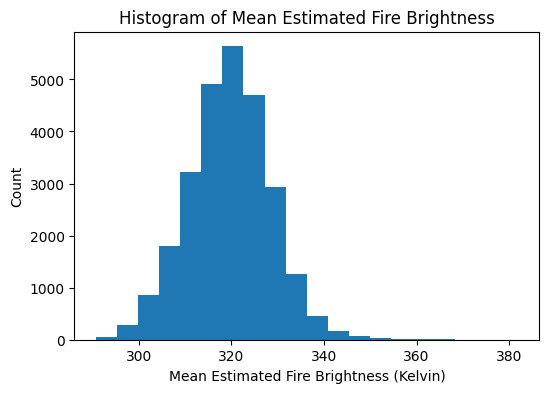

In [12]:
plt.figure(figsize=(6,4))
plt.hist(x=df['Mean_estimated_fire_brightness'],bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

#### What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


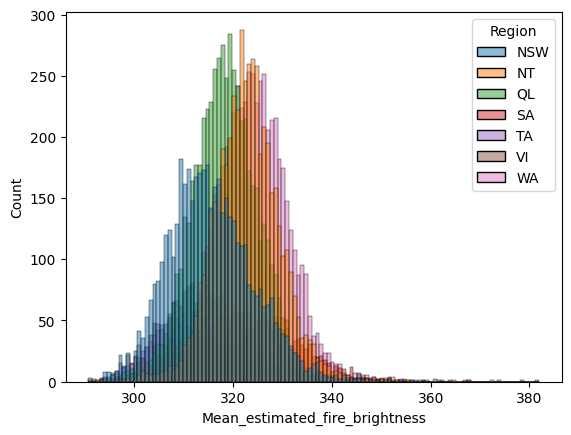

In [13]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

#### Now include the parameter `multiple='stack'` in the histplot() and see the difference. Include labels and titles as well


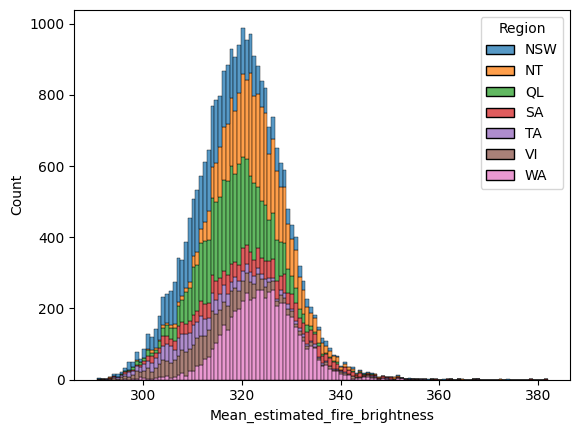

In [14]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

#### Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


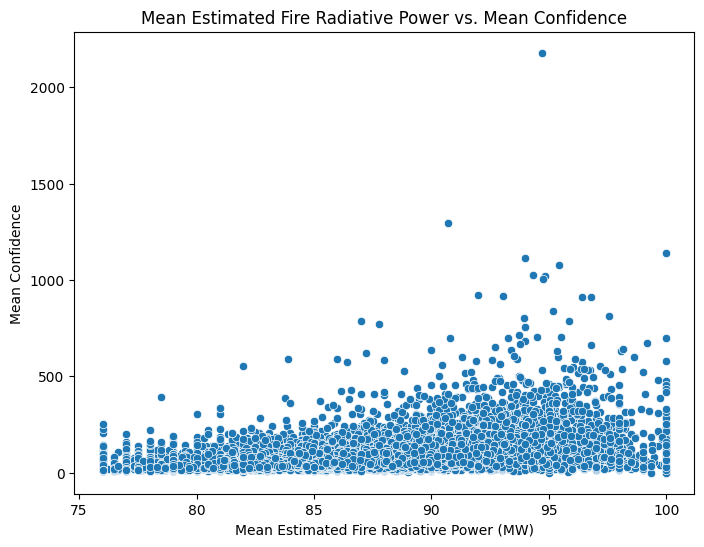

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

#### Let's mark these seven regions on the Map of Australia using Folium

In [16]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg = pd.DataFrame(region_data)
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

regionaus_reg = folium.map.FeatureGroup()


for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    regionaus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, 
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
Aus_map.add_child(regionaus_reg)